# Használjuk a szózsákmodellt az adatok tokenekre bontásához

## Ismerjük meg a szózsákmodellt

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import *

kategóriák = ['comp.graphics', 'misc.forsale',
              'rec.autos', 'sci.space']

húsz_tanítás = fetch_20newsgroups(subset='train',
                                  categories=kategóriák,
                                  shuffle=True,
                                  random_state=42)

számvektor = CountVectorizer()

X_tanító_számok = számvektor.fit_transform(
    húsz_tanítás.data)
print("Szózsák formája:", X_tanító_számok.shape)
caltech_idx = számvektor.vocabulary_['caltech']
print('"Caltech": %i' % X_tanító_számok[0, caltech_idx])

Szózsák formája: (2356, 34750)
"Caltech": 3


## Rendezzük sorozatokba a szövegelemeket n-gramokkal

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import *

kategóriák = ['sci.space']

húsz_tanítás = fetch_20newsgroups(subset='train',
                                  categories=kategóriák,
                                  remove=('headers',
                                          'footers',
                                          'quotes'),
                                  shuffle=True,
                                  random_state=42)

karakterszám = CountVectorizer(analyzer='char_wb',
                              ngram_range=(3,3),
                              max_features=10)

karakterszám.fit(húsz_tanítás['data'])

szószám = CountVectorizer(analyzer='word',
                              ngram_range=(2,2),
                              max_features=10,
                              stop_words='english')

szószám.fit(húsz_tanítás['data'])

X = karakterszám.transform(húsz_tanítás.data)

print(karakterszám.get_feature_names_out())
print(X[1].todense())
print(szószám.get_feature_names_out())

[' an' ' in' ' of' ' th' ' to' 'he ' 'ing' 'ion' 'nd ' 'the']
[[0 0 2 5 1 4 2 2 0 5]]
['anonymous ftp' 'commercial space' 'gamma ray' 'nasa gov'
 'national space' 'remote sensing' 'sci space' 'space shuttle'
 'space station' 'washington dc']


## Valósítsunk meg TF-IDF transzformációkat

In [3]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import *

kategóriák = ['comp.graphics', 'misc.forsale',
              'rec.autos', 'sci.space']
húsz_tanítás = fetch_20newsgroups(subset='train',
                                  categories=kategóriák,
                                  shuffle=True,
                                  random_state=42)

számvektor = CountVectorizer()
X_tanító_számok = számvektor.fit_transform(
    húsz_tanítás.data)

tfidf = TfidfTransformer().fit(X_tanító_számok)
X_tanító_tfidf = tfidf.transform(X_tanító_számok)

caltech_idx = számvektor.vocabulary_['caltech']
print('A "Caltech" pontszáma a szózsákban:')
print('darabszám: %0.3f' % X_tanító_számok[0, caltech_idx])
print('TF-IDF: %0.3f' % X_tanító_tfidf[0, caltech_idx])

A "Caltech" pontszáma a szózsákban:
darabszám: 3.000
TF-IDF: 0.123


In [4]:
import numpy as np
darabszám = np.mean(X_tanító_számok[X_tanító_számok > 0])
tfif = np.mean(X_tanító_tfidf[X_tanító_tfidf > 0])
print('átlagos darabszám: %0.3f' % np.mean(darabszám))
print('átlagos TF-IDF: %0.3f' % np.mean(tfif))

átlagos darabszám: 1.698
átlagos TF-IDF: 0.064


# Dolgozzunk gráfadatokkal

## Használjuk a NetworkX alapvető funkcióit

In [5]:
import networkx as nx

G = nx.cycle_graph(10)
A = nx.adjacency_matrix(G)

print(A.todense())

[[0 1 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 1 0 1]
 [1 0 0 0 0 0 0 0 1 0]]


C:\Users\revon\AppData\Local\Temp\ipykernel_6752\2536115678.py:4: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


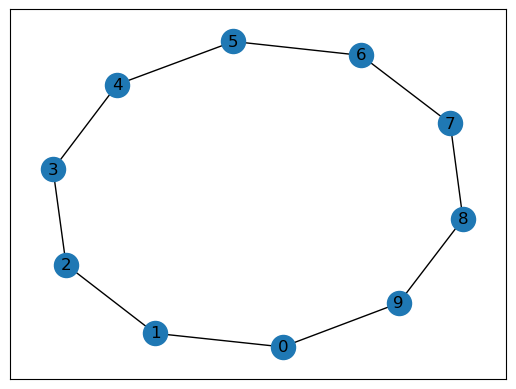

In [6]:
import matplotlib.pyplot as dg
%matplotlib inline
nx.draw_networkx(G)
dg.show()

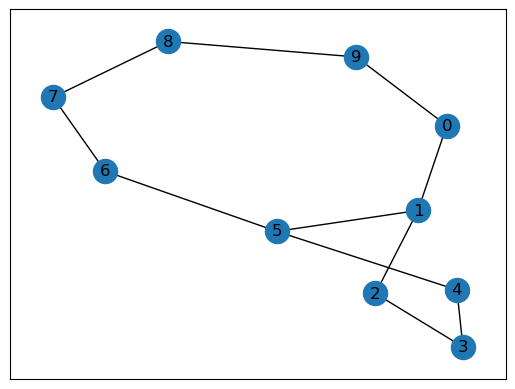

In [7]:
G.add_edge(1,5)
nx.draw_networkx(G)
dg.show()